# <span style="font-family:Bebas Neue; font-size:1em;">Proyecto Semestral - IEE2103</span>
Iván Vergara Lam | 2022-1

A partir del desarrollo en Wolfram Mathematica, se obtuvo que $s(x) = \ \uparrow \uparrow _{c} \ast \ a \cdot \wedge \left( \frac{1 - \frac{L}{2}}{\frac{L}{2}} \right)$ 

De esta manera, utilizando las propiedades de desplazamiento y escalamiento de la Transformada de Fourier, se puede notar que 

$$s(x, t) = \ \frac{a}{2} \cdot \left( \wedge \left( \frac{1 - \frac{L}{2} - ct}{\frac{L}{2}} \right) + \wedge \left( \frac{1 - \frac{L}{2} + ct}{\frac{L}{2}} \right) \right)$$

Esta expresión será utilizada durante todo el desarrollo del proyecto, corresponde a la onda triangular de sonido de una cuerda de guitarra.

In [1]:
# Librerías

import numpy as np
from math import sqrt, ceil, floor, exp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from random import random
import sounddevice as sd
from IPython.display import clear_output
from scipy.io import wavfile as wf

b) Para desarrollar este apartado, se definen las funciones que serán utilizadas, declarando las constantes reales a utilizar durante la primera etapa.

In [2]:
# Se define la función triángulo

def triangulo(x):
    return 2 * abs((x / 2) % 2 - 1) - 1

In [3]:
# Se define la funcion s(x, t) utilizando constantes reales

def s(
    x,  
    t,
    a = 1,                      # amplitud
    L = 0.648,                  # largo de cuerda estándar
    c = 427.23,    # velocidad
    u = 3.09 * (10 ** -4),      # densidad de la cuerda
    T = 56.4,                   # tensión
    fm = 44100                    
    ):
    muestra = np.linspace(0, t, ceil(t * fm))
    
    return (a / 2) * (triangulo((x - L / 2 - c * muestra) / (L / 2)) + triangulo((x - L / 2 + c * muestra) / (L / 2)))

In [4]:
# Definición de constantes

fm = 44100              # frecuencia en Hz
duracion = 2            # tiempo en segundos
amplitud = 1
largo_cuerda = 0.648    # largo en metros

In [5]:
# Se crea el sonido y se reproduce

sonido = s(largo_cuerda / 2, duracion, a = amplitud, L = largo_cuerda)
sd.play(sonido, fm)

Se puede apreciar que el sonido suena similar a una cuerda de guitarra.

c) Se redefine la función $s(x, t)$ para que la velocidad no sea una constante, sino que esté determinada por $c = \sqrt{\frac{T}{\mu}}$, donde $T$ representa la tensión de la cuerda y $\mu$ la densidad por unidad de largo.

In [6]:
def s(
    x,  
    t,
    a = 1,                      # amplitud
    L = 0.648,                  # largo de cuerda estándar    
    u = 3.09 * (10 ** -4),      # densidad de la cuerda
    T = 56.40,                  # tensión
    fm = 44100
    ):
    
    muestra = np.linspace(0, t, ceil(t * fm))
    c = sqrt(T / u)
    
    return (a / 2) * (triangulo((x - L / 2 - c * muestra) / (L / 2)) + triangulo((x - L / 2 + c * muestra) / (L / 2)))

In [7]:
# Se define una envolvente del tipo ADSR

def envolvente(x, t, fm = 44100):
    
    envelope = np.zeros(len(x))
    num = 0
    aux = {
        0: 0,
        1: 0.064,
        2: 0.154,
        3: 0.604,
        4: 0.95
    }

    for j in range(len(x)):
        
        i = x[j]
        num += (1 / (fm * t))

        if num < aux[1]:
            envelope[j] = ((i / 0.08) * num)
        
        elif num < aux[2]:
            envelope[j] = (i * (1 - (1 / 0.185) * (num - 0.024)))
        
        elif num < aux[3]:
            envelope[j] = (0.3 * i)
        
        elif num < aux[4]:
            envelope[j] = (i * (-0.858) * (num - 0.95))
        
        else:
            envelope[j] = 0

    maximo = max(envelope)
    
    return envelope / maximo

In [8]:
# Definición de constantes

fm = 44100              # frecuencia en Hz
duracion = 2            # tiempo en segundos
amplitud = 1
largo_cuerda = 0.648    # largo en metros

In [9]:
# Se crea el sonido y se le aplica la envolvente

sonido = envolvente(s(largo_cuerda / 2, duracion, a = amplitud, fm = fm , L = largo_cuerda), duracion, fm)

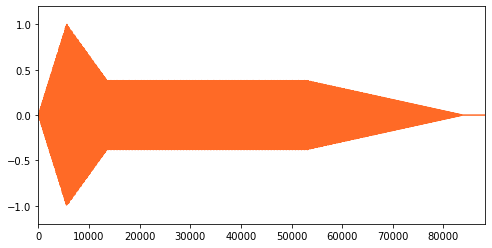

In [10]:
# Se reproduce el sonido envuelto y se grafica

fig, ax = plt.subplots(figsize = (8, 4))
ax.set_xlim(0, fm * duracion)
ax.set_ylim(-1.2, 1.2)
plt.plot(sonido, color = '#FF6A26')
sd.play(sonido, fm)

d) Para generar la síntesis de un acorde de guitarra, es necesario modelar las cuerdas de la guitarra con sus debidos parámetros.

In [11]:
# Se crea la clase cuerda para facilitar la implementación de acordes

class Cuerda:

    def __init__(self, nombre: str, tension: float, densidad: float, amplitud = 1, largo = 0.648):
        self.nombre = nombre
        self.tension = tension
        self.densidad = densidad
        self.amplitud = amplitud
        self.largo = largo

    def crear_sonido(self, duracion):
        return s(self.largo / 2, duracion, a = self.amplitud, L = self.largo, u = self.densidad, T = self.tension)
    
    def __repr__(self):
        return f'Cuerda: {self.nombre}\n' \
            + f'Tensión: {self.tension}\n' \
            + f'Densidad: {self.densidad}\n' \
            + f'Amplitud: {self.amplitud}\n' \
            + f'Largo: {self.largo}\n'

Se instancian las cuerdas utilizando la siguiente información

<p align="center">
  <img width="815" height="180" src="assets/cuerdas.jpg">
</p>

In [12]:
cuerdas = (
    ((0, 0), Cuerda('HI E', 56.40, 3.09 * (10 ** -4))),
    ((0, 1), Cuerda('B', 48.86, 4.77 * (10 ** -4))),
    ((1, 0), Cuerda('G', 66.61, 1.03 * (10 ** -3))),
    ((1, 1), Cuerda('D', 58.55, 1.62 * (10 ** -3))),
    ((2, 0), Cuerda('A', 71.11, 3.50 * (10 ** -3))),
    ((2, 1), Cuerda('LOW E', 65.90, 5.78 * (10 ** -3))),
)

In [13]:
# Se prueba el sonido de una cuerda

duracion = 2
sonido = cuerdas[5][1].crear_sonido(duracion)
print(f'Actualmente suena la cuerda {cuerdas[5][1].nombre}')

sd.play(envolvente(sonido, duracion, fm), fm)
sd.wait()

Actualmente suena la cuerda LOW E


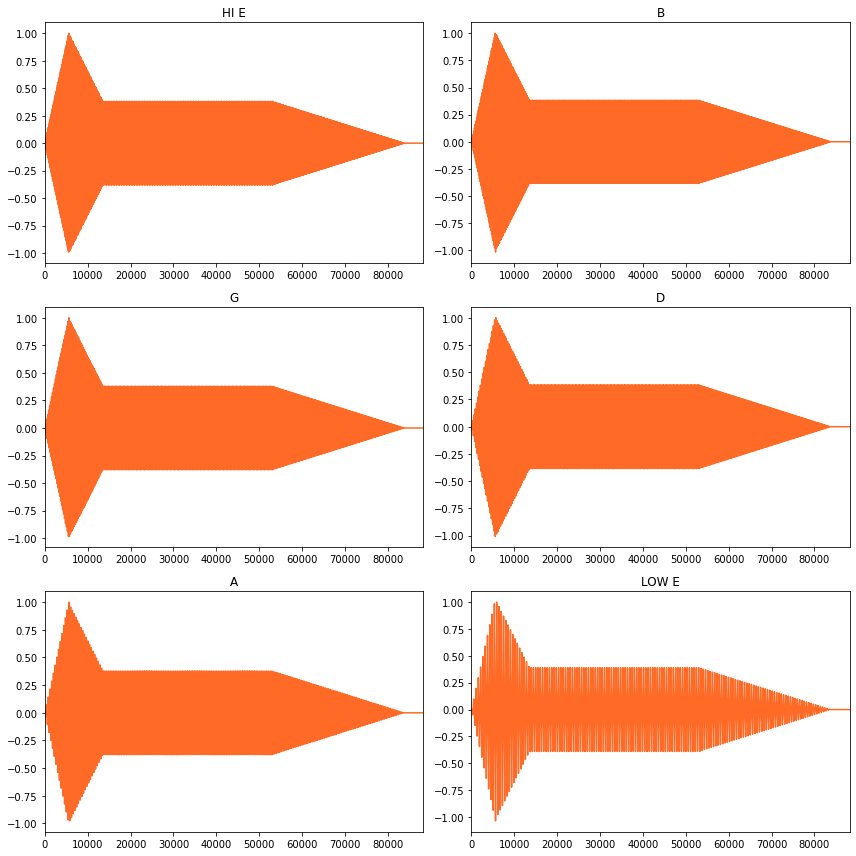

In [14]:
# Se reproducen las seis cuerdas en secuencia
# Posteriormente suena la colección de cuerdas simultáneamente

fig, ax = plt.subplots(3, 2, figsize = (12, 12))

rasguido = 0
for pos, cuerda in cuerdas:

    duracion = 2
    sonido = cuerda.crear_sonido(duracion)
    rasguido += sonido

    ax[pos[0], pos[1]].plot(envolvente(sonido, duracion, fm), color = '#FF6A26')
    ax[pos[0], pos[1]].set_title(cuerda.nombre) # Escojemos un título para el gráfico
    ax[pos[0], pos[1]].set_xlim(0, fm * duracion)

    print(f'Actualmente suena la cuerda {cuerda.nombre}')

    sd.play(envolvente(sonido, duracion, fm), fm)
    sd.wait()

    clear_output(wait = True)

print(f'Actualmente suena el rasguido')

sd.play(envolvente(rasguido, duracion, fm), fm)
sd.wait()

clear_output(wait = True)

plt.tight_layout()
plt.show()

In [15]:
# Se define el sonido del rasguido, es decir, la colección de las seis de ellas sonando simultáneamente

def sonido_rasguido(duracion):
    
    cuerdas = (
        Cuerda('HI E', 56.40, 3.09 * (10 ** -4)),
        Cuerda('B', 48.86, 4.77 * (10 ** -4)),
        Cuerda('G', 66.61, 1.03 * (10 ** -3)),
        Cuerda('D', 58.55, 1.62 * (10 ** -3)),
        Cuerda('A', 71.11, 3.50 * (10 ** -3)),
        Cuerda('LOW E', 65.90, 5.78 * (10 ** -3)),
    )

    rasguido = 0

    for cuerda in cuerdas:
        sonido = cuerda.crear_sonido(duracion)
        rasguido += sonido

    return rasguido

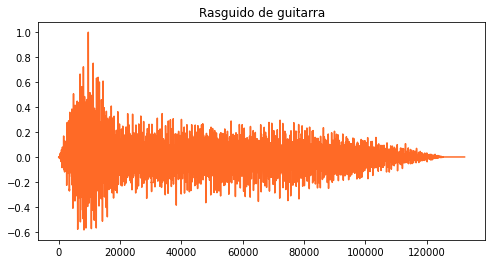

In [16]:
# Se reproduce y grafica el rasguido

duracion = 3

fit, ax = plt.subplots(figsize = (8, 4))
plt.plot(envolvente((sonido_rasguido(duracion)), duracion, fm), color = '#FF6A26')
plt.title('Rasguido de guitarra')
plt.show()
sd.play(envolvente((sonido_rasguido(duracion)), duracion, fm), fm)
sd.wait()

Se puede apreciar como el sonido se asemeja a rasgar las cuerdas al aire en una guitarra real.

e) Para implementar la melodía, se deben crear acordes, por lo que se define una serie de funciones a continuación.

In [17]:
# Para modelar los acordes de manera realista, se implementa la variable de trastes

def largo_traste(n, l):
    return l / (2 ** (n / 12))

In [18]:
# Permite crear acordes a partir de una lista de tuplas y un número float

def crear_acorde(lista, duracion):

    cuerdas = (
        ((0, 0), Cuerda('HI E', 56.40, 3.09 * (10 ** -4))),
        ((0, 1), Cuerda('B', 48.86, 4.77 * (10 ** -4))),
        ((1, 0), Cuerda('G', 66.61, 1.03 * (10 ** -3))),
        ((1, 1), Cuerda('D', 58.55, 1.62 * (10 ** -3))),
        ((2, 0), Cuerda('A', 71.11, 3.50 * (10 ** -3))),
        ((2, 1), Cuerda('LOW E', 65.90, 5.78 * (10 ** -3))),
    )
    
    sonido = []

    for num_cuerda, traste in lista:
        sonido.append(
            s(
                x = largo_traste(traste, cuerdas[num_cuerda][1].largo) / 2, \
                t = duracion, \
                T = cuerdas[num_cuerda][1].tension, \
                u = cuerdas[num_cuerda][1].densidad, \
                L = largo_traste(traste, cuerdas[num_cuerda][1].largo)
            )
        )
    
    return sum(sonido)

In [19]:
# Para evaluar la función para crear acordes, se crea la escala Do Re Mi Fa Sol La Si

duracion = 1

Do = crear_acorde([(1, 3), (2, 2), (3, 0), (4, 1), (5, 0)], duracion)
Re = crear_acorde([(2, 0), (3, 2), (4, 3), (5, 2)], duracion)
Mi = crear_acorde([(0, 0), (1, 2), (2, 2), (3, 1), (4, 0), (5, 0)], duracion)
Fa = crear_acorde([(0, 1), (1, 3), (2, 3), (3, 2), (4, 1), (5, 1)], duracion)
Sol = crear_acorde([(0, 3), (1, 2), (2, 0), (3, 0), (4, 0), (5, 3)], duracion)
La = crear_acorde([(1, 0), (2, 2), (3, 2), (4, 2), (5, 0)], duracion)
Si = crear_acorde([(1, 1), (2, 3), (3, 3), (4, 3), (5, 1)], duracion)

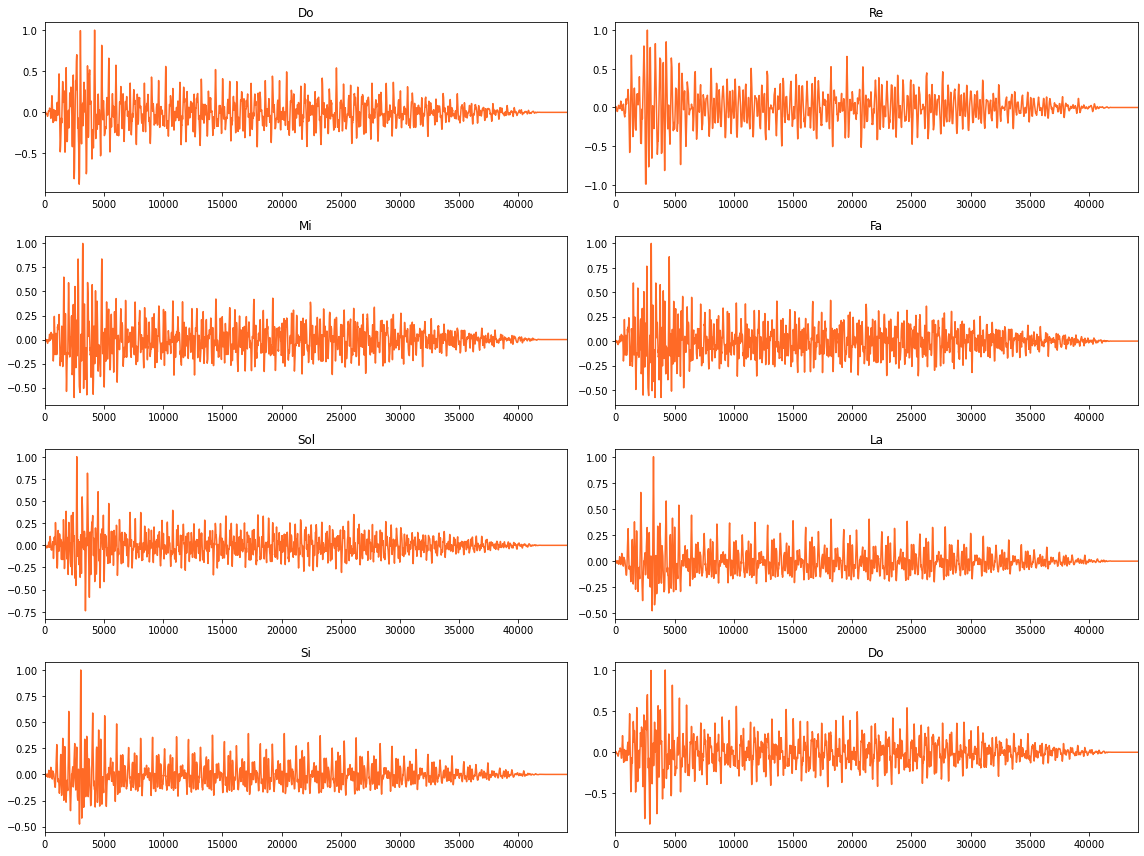

In [20]:
# Se reproduce y gráfica la escala

notas = (
    ((0, 0), Do, 'Do'),
    ((0, 1), Re, 'Re'),
    ((1, 0), Mi, 'Mi'),
    ((1, 1), Fa, 'Fa'),
    ((2, 0), Sol, 'Sol'),
    ((2, 1), La, 'La'),
    ((3, 0), Si, 'Si'),
    ((3, 1), Do, 'Do'),
)

fig, ax = plt.subplots(4, 2, figsize = (16, 12))

rasguido = 0
for pos, nota, nombre in notas:

    duracion = 1

    ax[pos[0], pos[1]].plot(envolvente(nota, duracion, fm), color = '#FF6A26')
    ax[pos[0], pos[1]].set_title(nombre) # Escogemos un título para el gráfico
    ax[pos[0], pos[1]].set_xlim(0, fm * duracion)

    print(f'Actualmente suena la nota {nombre}')

    sd.play(envolvente(nota, duracion, fm), fm)
    sd.wait()

    clear_output(wait = True)

# plt.plot(envolvente(rasguido, duracion, fm), color = 'orange')

plt.tight_layout()
plt.show()

A continuación, se debe escoger una de las siguientes melodías y ejecutar su celda de código, es recomendable escoger _Wish You Were Here_ de _Pink Floyd_.

In [21]:
'''
House of the Rising Sun - The Animals

[Intro]
   Am                      C                       D                       F
e|-------------0-----------------------0-------------------2---2-------------------1---1-----------|
B|---------1-------1---------------1-------1-------------3---------3-------------1---------1-------|
G|-------2-------------0---------0-------------0-------2---------------0-------2---------------0---|
D|-----2-----------------------2-------------------0-----------------------3-----------------------|
A|-0-----------------------3-----------------------------------------------------------------------|
E|-------------------------------------------------------------------------------------------------|
 
   Am                      E                       Am                      E
e|-----------0-0-----------------------0-----------------------0-----------------------0-----------|
B|---------1-------1----------------(0)----0---------------1-------1-----------------0-----0-------|
G|-------2-------------0-----------1-----------0---------2-------------0-----------1-----------0---|
D|-----2-------------------------2---------------------2-------------------------2-----------------|
A|-0---------------------------2-------------------0---------------------------2-------------------|
E|-------------------------0-----------------------------------------------0-----------------------|
'''

duracion_1 = 0.35
duracion_2 = 0.55

lista_cancion = [
   (crear_acorde([(4, 0)], duracion_2), duracion_2),
   (crear_acorde([(3, 2)], duracion_1), duracion_1),
   (crear_acorde([(2, 2)], duracion_1), duracion_1),
   (crear_acorde([(1, 1)], duracion_1), duracion_1),
   (crear_acorde([(0, 0)], duracion_2), duracion_2),
   (crear_acorde([(1, 1)], duracion_2), duracion_2),
   (crear_acorde([(2, 0)], duracion_2), duracion_2),
   (crear_acorde([(4, 3)], duracion_2), duracion_2),
   (crear_acorde([(2, 0)], duracion_1), duracion_1),
   (crear_acorde([(2, 1)], duracion_1), duracion_1),
   (crear_acorde([(1, 0)], duracion_2), duracion_2),
   (crear_acorde([(0, 0)], duracion_1), duracion_1),
   (crear_acorde([(1, 0)], duracion_2), duracion_2),
   (crear_acorde([(2, 0)], duracion_2), duracion_2),
   (crear_acorde([(3, 0)], duracion_2), duracion_2),
   (crear_acorde([(2, 2)], duracion_1), duracion_1),
   (crear_acorde([(1, 3)], duracion_1), duracion_1),
   (crear_acorde([(0, 2)], duracion_2), duracion_2),
   (crear_acorde([(0, 2)], duracion_2), duracion_2),
   (crear_acorde([(1, 3)], duracion_2), duracion_2),
   (crear_acorde([(2, 0)], duracion_2), duracion_2),
   (crear_acorde([(3, 3)], duracion_2), duracion_2),
   (crear_acorde([(2, 2)], duracion_1), duracion_1),
   (crear_acorde([(1, 1)], duracion_1), duracion_1),
   (crear_acorde([(0, 1)], duracion_2), duracion_2),
   (crear_acorde([(0, 1)], duracion_2), duracion_2),
   (crear_acorde([(1, 1)], duracion_2), duracion_2),
   (crear_acorde([(2, 0)], duracion_2), duracion_2),
   (crear_acorde([(4, 0)], duracion_2), duracion_2),
   (crear_acorde([(3, 2)], duracion_1), duracion_1),
   (crear_acorde([(2, 2)], duracion_1), duracion_1),
   (crear_acorde([(1, 1)], duracion_1), duracion_1),
   (crear_acorde([(0, 0)], duracion_1), duracion_1),
   (crear_acorde([(0, 0)], duracion_1), duracion_1),
   (crear_acorde([(1, 1)], duracion_2), duracion_2),
   (crear_acorde([(2, 0)], duracion_2), duracion_2),
   (crear_acorde([(5, 0)], duracion_2), duracion_2),
   (crear_acorde([(4, 2)], duracion_1), duracion_1),
   (crear_acorde([(3, 2)], duracion_1), duracion_1),
   (crear_acorde([(2, 1)], duracion_1), duracion_1),
   (crear_acorde([(1, 0)], duracion_1), duracion_1),
   (crear_acorde([(0, 0)], duracion_1), duracion_1),
   (crear_acorde([(1, 0)], duracion_2), duracion_2),
   (crear_acorde([(2, 0)], duracion_2), duracion_2),
   (crear_acorde([(4, 0)], duracion_2), duracion_2),
   (crear_acorde([(3, 2)], duracion_1), duracion_1),
   (crear_acorde([(2, 2)], duracion_1), duracion_1),
   (crear_acorde([(1, 1)], duracion_1), duracion_1),
   (crear_acorde([(0, 0)], duracion_2), duracion_2),
   (crear_acorde([(1, 1)], duracion_2), duracion_2),
   (crear_acorde([(2, 0)], duracion_2), duracion_2),
   (crear_acorde([(5, 0)], duracion_2), duracion_2),
   (crear_acorde([(4, 2)], duracion_1), duracion_1),
   (crear_acorde([(3, 2)], duracion_1), duracion_1),
   (crear_acorde([(2, 1)], duracion_1), duracion_1),
   (crear_acorde([(1, 0)], duracion_1), duracion_1),
   (crear_acorde([(0, 0)], duracion_1), duracion_1),
   (crear_acorde([(1, 0)], duracion_2), duracion_2),
   (crear_acorde([(2, 0)], duracion_2), duracion_2)
]


In [22]:
'''
Wild World _ Yusuf / Cat Stevens
e|-------------5-----------|-------------5-----------|
B|-------5--------5-----5--|-------5--------5-----5--|
G|----7-----7--------7-----|----7-----7--------7-----|
D|-0-----------------------|-0-----------------------|
A|-------------------------|-------------------------|
E|-------------------------|-------------------------|
'''

duracion_1 = 0.4
duracion_2 = 0.7

lista_cancion = [
   (crear_acorde([(3, 0)], duracion_1), duracion_1),
   (crear_acorde([(2, 7)], duracion_1), duracion_1),
   (crear_acorde([(1, 5)], duracion_1), duracion_1),
   (crear_acorde([(2, 7)], duracion_2), duracion_2),
   (crear_acorde([(0, 5)], duracion_1), duracion_1),
   (crear_acorde([(1, 5)], duracion_1), duracion_1),
   (crear_acorde([(2, 7)], duracion_1), duracion_1),
   (crear_acorde([(1, 5)], duracion_1), duracion_1)
]


In [23]:
'''
Dark Red - Steve Lacy

E|--------------------------------------|
B|--------------------------------------|
G|--------------------------------------|
D|--------------------------------------|. x4
A|----------------6-6--4-4--------------|
E|-6-6--5-5--4-4-4----------7-7--6-6-6--|
'''
duracion_1 = 0.4
duracion_2 = 0.6

lista_cancion = [
   (crear_acorde([(5, 6)], duracion_1), duracion_1),
   (crear_acorde([(5, 6)], duracion_1), duracion_1),
   (crear_acorde([(5, 5)], duracion_1), duracion_1),
   (crear_acorde([(5, 5)], duracion_2), duracion_2),
   (crear_acorde([(5, 4)], duracion_1), duracion_1),
   (crear_acorde([(5, 4)], duracion_1), duracion_1),
   (crear_acorde([(5, 4)], duracion_1), duracion_1),
   (crear_acorde([(4, 6)], duracion_1), duracion_1),
   (crear_acorde([(4, 6)], duracion_2), duracion_2),
   (crear_acorde([(4, 4)], duracion_1), duracion_1),
   (crear_acorde([(4, 4)], duracion_2), duracion_2),
   (crear_acorde([(5, 7)], duracion_1), duracion_1),
   (crear_acorde([(5, 7)], duracion_2), duracion_2),
   (crear_acorde([(5, 6)], duracion_1), duracion_1),
   (crear_acorde([(5, 6)], duracion_1), duracion_1),
   (crear_acorde([(5, 6)], duracion_2), duracion_2)
]

In [24]:
'''
Wish You Were Here - Pink Floyd

e|------------------|-3--3--3--3-3-|--------------|--3--3--3--3-3--|
B|------------------|-3--3--3--3-3-|--------------|--3--3--3--3-3--|
G|------------------|-0--0--0--0-0-|----0---------|--0--0--0--0-0--|
D|-------------0--2-|-2--2--2--2-2-|-------2--0---|--0--0--0--0-0--| x2
A|------0h2---------|-2--2--2--2-2-|--------------|--2--2--2--2-2--|
E|---(3)------------|-x--x--x--x-x-|--------------|--3--3--3--3-3--|
'''

duracion_1 = 0.45
duracion_2 = 0.65
duracion_3 = 1.1

lista_cancion = [
    (crear_acorde([(5, 3)], duracion_1), duracion_1),
    (crear_acorde([(4, 0)], duracion_3), duracion_3),
    (crear_acorde([(3, 0)], duracion_2), duracion_2),
    (crear_acorde([(3, 2)], duracion_2), duracion_2),
    (crear_acorde([(0, 3), (1, 3), (2, 0), (3, 2), (4, 2), (5, 10)], duracion_2), duracion_2),
    (crear_acorde([(0, 3), (1, 3), (2, 0), (3, 2), (4, 2), (5, 10)], duracion_2), duracion_2),
    (crear_acorde([(0, 3), (1, 3), (2, 0), (3, 2), (4, 2), (5, 10)], duracion_2), duracion_2),
    (crear_acorde([(0, 3), (1, 3), (2, 0), (3, 2), (4, 2), (5, 10)], duracion_1), duracion_1),
    (crear_acorde([(0, 3), (1, 3), (2, 0), (3, 2), (4, 2), (5, 10)], duracion_3), duracion_3),
    (crear_acorde([(2, 0)], duracion_2), duracion_2),
    (crear_acorde([(3, 2)], duracion_2), duracion_2),
    (crear_acorde([(3, 0)], duracion_3), duracion_3),
    (crear_acorde([(0, 3), (1, 3), (2, 0), (3, 0), (4, 2), (5, 3)], duracion_2), duracion_2),
    (crear_acorde([(0, 3), (1, 3), (2, 0), (3, 0), (4, 2), (5, 3)], duracion_2), duracion_2),
    (crear_acorde([(0, 3), (1, 3), (2, 0), (3, 0), (4, 2), (5, 3)], duracion_2), duracion_2),
    (crear_acorde([(0, 3), (1, 3), (2, 0), (3, 0), (4, 2), (5, 3)], duracion_1), duracion_1),
    (crear_acorde([(0, 3), (1, 3), (2, 0), (3, 0), (4, 2), (5, 3)], duracion_2), duracion_2),
    (crear_acorde([(5, 3)], duracion_1), duracion_1),
    (crear_acorde([(4, 0)], duracion_3), duracion_3)
]

In [25]:
# Permite cambiar el formato de lista a np.ndarray

def vstack(tup):
    return np.concatenate([m[0] for m in tup], 0)
    
cancion = vstack(lista_cancion)
duracion_cancion = sum(list(map(lambda x: x[1], lista_cancion)))

In [26]:
def tocar_cancion(cancion, parametro_f = 1):

   fig, ax = plt.subplots(figsize = (8, 4))
      
   sd.play(envolvente(cancion, duracion_cancion), fm * parametro_f)
   sd.wait()

   plt.plot(envolvente(cancion, duracion_cancion, fm), color = '#FF6A26')
   #ax.set_xlim(0, fm * duracion)
   
   plt.show()

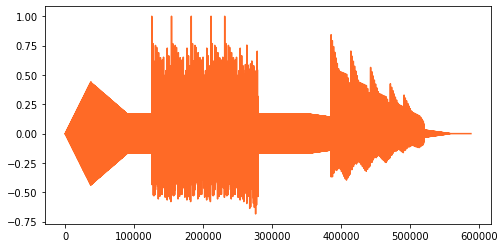

In [27]:
# Reproduce y grafica la función

tocar_cancion(cancion)

2)

a) Hasta ahora la canción suena un poco robótica, similar al soundtrack de un juego de 8-bit. Lo que se hará a continuación permitirá que suene más natural a nuestro oído.

In [28]:
# Se define el delay como una convolución
# Depende del tiempo de delay y su coficiente de atenuación

def delay(sonido, tiempo_delay, coeficiente_delay, fm = 44100):
    
    if coeficiente_delay == 0:
        return sonido

    retraso = np.zeros(ceil(tiempo_delay * fm))
    retraso[0] = 1
    
    if tiempo_delay > 1:
        for i in range(1, ceil(tiempo_delay)):
            retraso[i * fm] = sqrt(coeficiente_delay)

        convolucion = np.convolve(retraso, sonido)
        maximo = max(convolucion)

        return convolucion / maximo
        
    return sonido


In [29]:
# Se crea el mismo sonido del comienzo y se definen constantes

duracion = 2                        # tiempo en segundos
sonido = s(0.324, duracion, a = 1)

tiempo_delay = 2                    # tiempo en segundos
coeficiente_delay = 0.2             # decimal que fluctúa entre 0 y 1    

In [30]:
# Se crea el sonido con delay

sonido_delay = delay(sonido, tiempo_delay, coeficiente_delay)

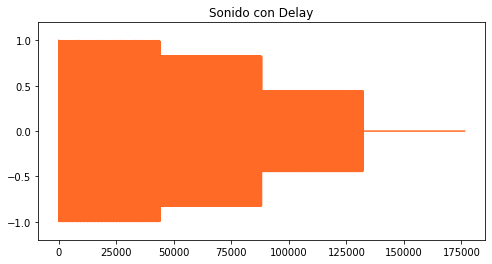

In [31]:
# Se reproduce y grafica el sonido del comienzo, ahora con delay

fig, ax = plt.subplots(figsize = (8, 4))

ax.set_ylim(-1.2, 1.2)
plt.title('Sonido con Delay')
plt.plot(sonido_delay, color = '#FF6A26')

sd.play(sonido_delay, fm)

b) A continuación, se evaluará el comportamiento del delay cuando es aplicado a acordes.

In [32]:
# Se evalúa el delay en el caso del rasguido

rasguido_delay = delay(envolvente(sonido_rasguido(duracion), duracion, fm), tiempo_delay, coeficiente_delay)

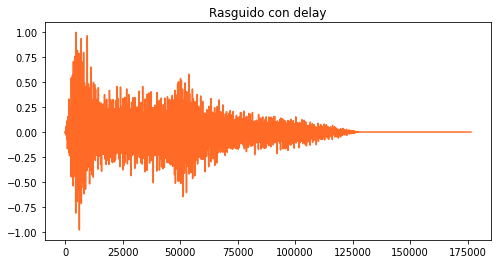

In [33]:
# Se reproduce y grafica

duracion = 2
tiempo_delay = 2
coeficiente_delay = 0.5

fig, ax = plt.subplots(figsize = (8, 4))

sd.play(rasguido_delay, fm) #suena la rosada 
plt.plot(rasguido_delay, color = '#FF6A26')
plt.title('Rasguido con delay')
plt.show()

In [34]:
# Se define la variable song como la canción con delay

song = delay(envolvente(cancion, duracion_cancion), tiempo_delay, coeficiente_delay)

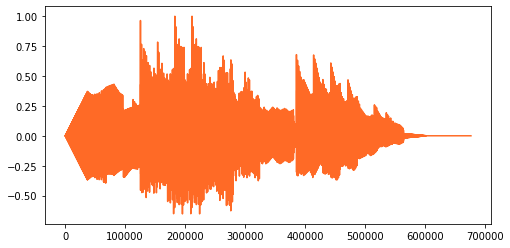

In [35]:
# Se reproduce y grafica

fig, ax = plt.subplots(figsize = (8, 4))

sd.play(song, fm)

plt.plot(song, color = '#FF6A26')
plt.show()

Se puede apreciar como cambia mucho en la forma del gráfico respecto al que se encuentra en el ítem 1.

3)

a) Para elaborar un ecualizador, se deben crear los filtros que lo compondrán.

In [36]:
# Se define el rect

def rect(x):
    
    if 0 <= x and x <= 1:
        return 1

    return 0

In [37]:
def pasa_bajos(sonido, frecuencia):
    dft = np.fft.rfft(sonido)             
    for i in range(len(dft)):
        dft[i] = dft[i] * rect((i) / (16 * frecuencia))
    return np.fft.irfft(dft)

def pasa_altos(sonido, frecuencia):
    dft = np.fft.rfft(sonido)             
    for i in range(len(dft)):
        dft[i] = dft[i] * (1 - rect((i) / (16 * frecuencia)))
    return np.fft.irfft(dft)

def pasa_banda(sonido, frecuencias):
    p_altos = pasa_altos(sonido, frecuencias[0])
    return pasa_bajos(p_altos, frecuencias[1])

def rechaza_banda(sonido, frecuencias):
    p_bajos = pasa_bajos(sonido, frecuencias[0])
    p_altos = pasa_altos(p_bajos, frecuencias[1])
    return p_bajos + p_altos

In [38]:
# Definición de constantes

frecuencia = 250
f_pasa_banda = (300, 900)
f_rechaza_banda = (200, 400)
tiempo_delay = 2
coeficiente_delay = 0.1

In [39]:
# Se crea la melodía con delay que será sometida a los cuatro filtros creados

song = delay(envolvente(cancion, duracion_cancion), tiempo_delay, coeficiente_delay)

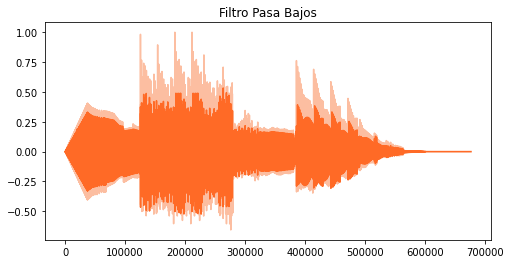

In [40]:
# Se aplica, reproduce y grafica el filtro pasa bajos

fig, ax = plt.subplots(figsize = (8, 4))
song_filtrada = pasa_bajos(song, frecuencia)
plt.plot(song, color = '#FCBEA1')
plt.plot(song_filtrada, color = '#FF6A26')
plt.title('Filtro Pasa Bajos')
sd.play(song_filtrada, fm)
sd.wait()

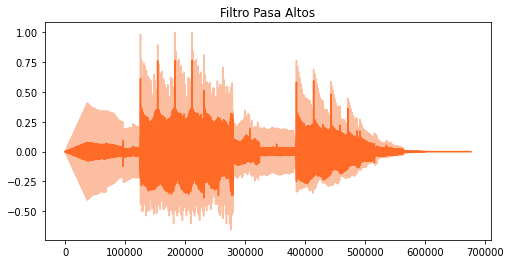

In [41]:
# Se aplica, reproduce y grafica el filtro pasa altos

fig, ax = plt.subplots(figsize = (8, 4))
song_filtrada = pasa_altos(song, frecuencia)
plt.plot(song, color = '#FCBEA1')
plt.plot(song_filtrada, color = '#FF6A26')
plt.title('Filtro Pasa Altos')
sd.play(song_filtrada, fm)
sd.wait()

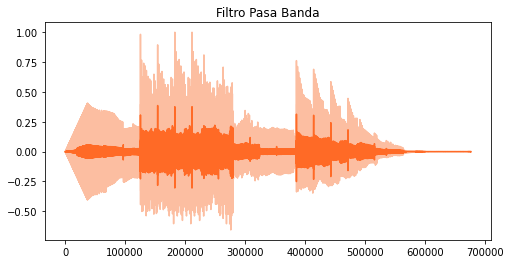

In [42]:
# Se aplica, reproduce y grafica el filtro pasa banda

fig, ax = plt.subplots(figsize = (8, 4))
song_filtrada = pasa_banda(song, f_pasa_banda)
plt.plot(song, color = '#FCBEA1')
plt.plot(song_filtrada, color = '#FF6A26')
plt.title('Filtro Pasa Banda')
sd.play(song_filtrada, fm)
sd.wait()

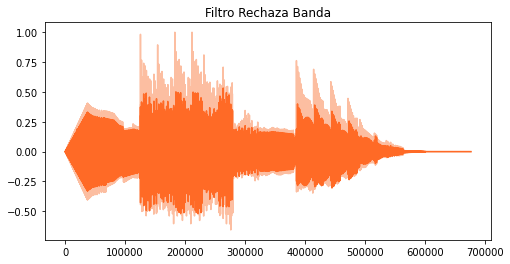

In [43]:
# Se aplica, reproduce y grafica el filtro rechaza banda

fig, ax = plt.subplots(figsize = (8, 4))
song_filtrada = rechaza_banda(song, f_rechaza_banda)
plt.plot(song, color = '#FCBEA1')
plt.plot(song_filtrada, color = '#FF6A26')
plt.title('Filtro Rechaza Banda')
sd.play(song_filtrada, fm)
sd.wait()

In [44]:
# Se elabora el ecualizador a cinco bandas con los filtros creados

def ecualizador(sonido, parametros):
    ecualizado = []

    filtros = [
        pasa_bajos(sonido, parametros['p_bajo_1']),
        pasa_altos(sonido, parametros['p_alto']),
        pasa_banda(sonido, parametros['p_banda']),
        rechaza_banda(sonido, parametros['r_banda']),
        pasa_bajos(sonido, parametros['p_bajo_2'])
    ]
    
    for i in sum(filtros):
        ecualizado.append(i / 5)

    return ecualizado
    

b) Posteriormente, el ecualizador es aplicado a la melodía, las constantes pueden variar.

In [45]:
# Definición de constantes

params = {
    'p_bajo_1': 600,
    'p_bajo_2': 400,
    'p_alto': 150,
    'p_banda': (300, 600),
    'r_banda': (500, 700)
}

tiempo_delay = 2
coeficiente_delay = 0.1

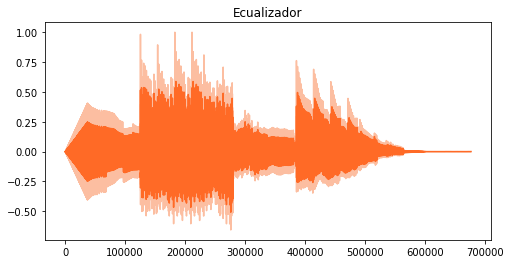

In [46]:
# Se aplica, reproduce y grafica la melodía ecualizada

fig, ax = plt.subplots(figsize = (8, 4))
song_ecualizada = ecualizador(song, params)
plt.plot(song, color = '#FCBEA1')
plt.plot(song_ecualizada, color = '#FF6A26')
plt.title('Ecualizador')
sd.play(song_ecualizada, fm)
sd.wait()

4)

a) Para crea el reverberador se utiliza una respuesta al impulso.

In [47]:
# Importe de respuesta al impulso en formato de audio

audio = wf.read('assets/ir_1.wav')[1][:, 0]

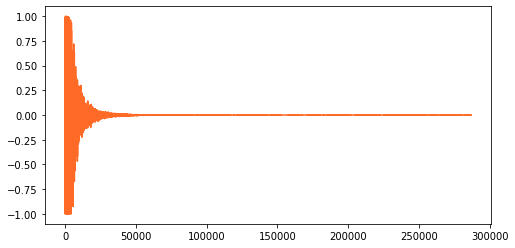

In [48]:
# La respuesta al impulso es reproducida y graficada

fig, ax = plt.subplots(figsize = (8, 4))
sd.play(audio, fm)
plt.plot(audio, color = '#FF6A26')
plt.show()

In [49]:
# Se define el reverberador a través de una convolución

def reverberador(sonido, respuesta, distancia, coef = 0.5, c = 340, fm = 44100):
    reverb =  np.convolve(sonido, respuesta)

    maximo = max(reverb)
    reverb /= maximo
    
    tiempo_delay = 2 * distancia / c

    return delay(reverb, tiempo_delay, coef)

In [50]:
# Definición de constantes

distancia = 100
coeficiente_delay = 0.2

In [51]:
# Se prueba el reverberador con el acorde Do

sd.play(reverberador(audio, Do, distancia), fm)

In [52]:
# Se ecualiza la canción y se guarda en una variable

song_ecualizada = ecualizador(song, params)

In [53]:
# Se aplica el reverberador a la melodía ecualizada

reverb = reverberador(song_ecualizada, audio, distancia, coef = coeficiente_delay)

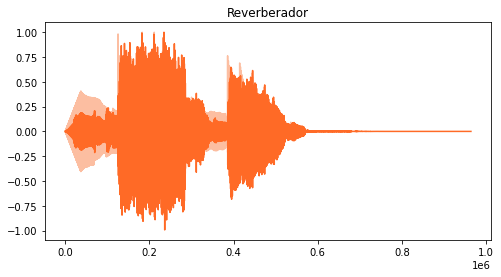

In [54]:
# Se grafica y reproduce el resultado

fig, ax = plt.subplots(figsize = (8, 4))
plt.plot(song, color = '#FCBEA1')
plt.plot(reverb, color = '#FF6A26')
plt.title('Reverberador')
sd.play(reverb, fm)
sd.wait()

Notas: 
* En las funciones definidas es común la normalización de las amplitudes, con la finalidad de evitar el exceso de sonidos saturados al utilizar el programa.

* Cuando se muestran dos funciones en un gráfico, la clara corresponde a la señal original, mientras que la oscura corresponde a la señal luego de que se le aplica la función descrita en cada apartado.